# FAVIANA NORONHA - The Sparks Foundation Internship

### Problem Statement :

`1. In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. `

`2. This is a simple linear regression task as it involves just 2 variables.`



`So our target variable is` $Scores$

### Questions : 
    What will be predicted score if a student studies for 9.25 hrs/ day? 


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Score dataset

In [10]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [66]:
#Import Libraries
import numpy as np 
import pandas as pd

In [12]:
#Read the CSV file 
Student = pd.read_csv("Score.csv")

In [13]:
# Check the head of the dataset
Student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
# Check the number of rows and columns in the dataframe
Student.shape

(25, 2)

In [15]:
#Print a concise summary of a DataFrame.
Student.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
Student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

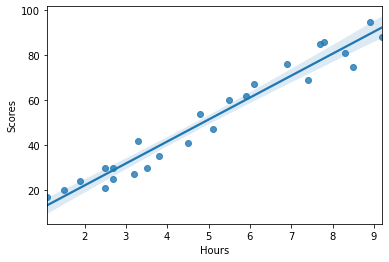

In [18]:
# Plotting the distribution of scores
#Student.plot(x='Hours', y='Scores', style='o')  
#plt.title('Hours vs Percentage')  
#plt.xlabel('Hours Studied')  
#plt.ylabel('Percentage Score')  
#plt.show()
sns.regplot(x = 'Hours' , y='Scores', data= Student)

##### It shows a high positive correlation between Hours and Scores.

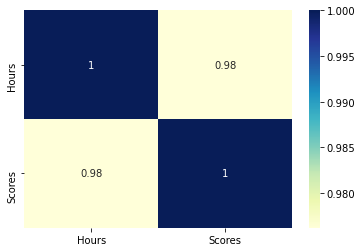

In [19]:
sns.heatmap(Student.corr(), cmap="YlGnBu", annot = True)
plt.show()

##### The correlation Between Hours and Scores is pretty high given by 0.98.

In [20]:
Student.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


HeatMap is another way to visusualize data and corr() relation gives n*n square matrix where each cell represent the corelation among each other.

## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times Hours$

The $m$ values are called the model **coefficients** or **model parameters**.


### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Scores`, to the variable `y`.

In [21]:
#Create X and y
X = Student['Hours']
y = Student['Scores']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
# Let's now take a look at the train dataset

X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [24]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [26]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [27]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


In [28]:
X_train_sm.head()

,const,Hours
6,1.0,9.2
12,1.0,4.5
4,1.0,3.5
24,1.0,7.8
0,1.0,2.5


In [29]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [30]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [57]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           1.15e-11
Time:                        16:53:26   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. R-squared
2. F statistic and its significance

##### 1. R - squared is 0.957
Meaning that 95.7% of the variance in `Scores` is explained by `Hours`

This is a decent R-squared value.

###### 2. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Scores = 1.495 + 9.8717 \times Hours $

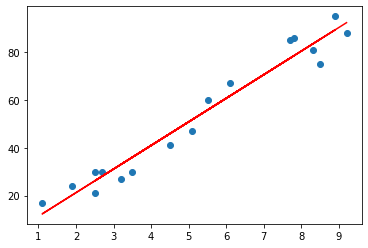

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 + 9.8717*X_train, 'r')
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

In [32]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

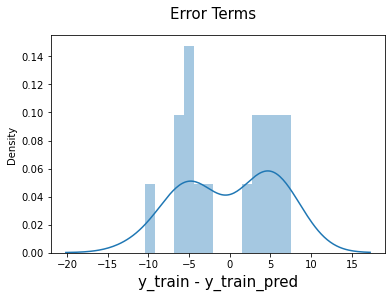

In [65]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

#### Looking for patterns in the residuals

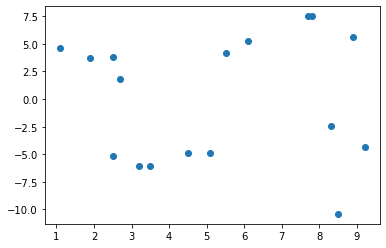

In [33]:
plt.scatter(X_train,res)
plt.show()

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [51]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [35]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

##### Looking at the RMSE

In [38]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160841

In [5]:
###### Checking the R-squared on the test set

In [48]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687439

In [7]:
##### Visualizing the fit on the test set

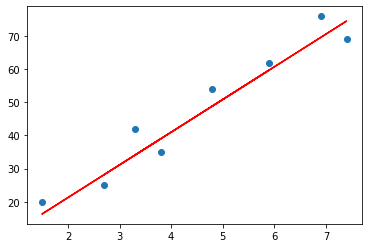

In [63]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.4951 + 9.8717 * X_test, 'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [88]:
X = Student.iloc[:, :-1].values  
y = Student.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [89]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [90]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


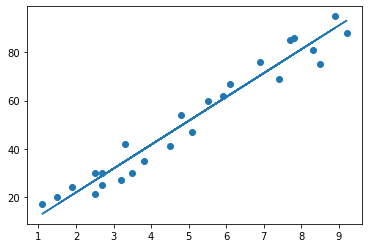

In [91]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [92]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [93]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


###### The actual and Predicted value is almost close to each other.

In [98]:
#Estimating training and test score
print("Training score:",regressor.score(X_train,y_train))
print("Training score:",regressor.score(X_test,y_test))

Training score: 0.9515510725211552
Training score: 0.9454906892105356


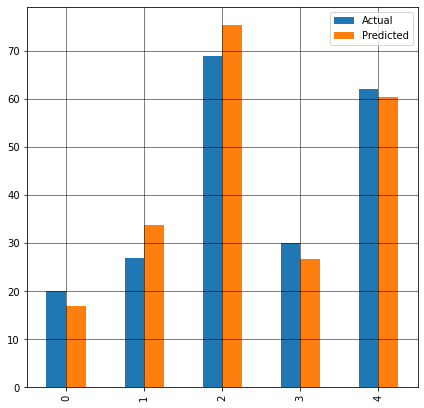

In [99]:
#plotting the grid to depict the actual and predicted value
df.plot(kind = 'bar',figsize = (7,7))
plt.grid(which = 'major',linewidth='0.5',color='green')
plt.grid(which = 'major',linewidth='0.5',color='black')
plt.show()

In [95]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**


In [87]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
